# Using statistics to historically compare notebooks and cells

This notebooks demonstrates a usage of [2018-08-25-Notebook-git-histories-as-dataframes.ipynb](2018-08-25-Notebook-git-histories-as-dataframes.ipynb) to quantify changes in notebook source code over time.

> We should include "git distances".

In [1]:
    from .__Notebook_git_histories_as_dataframes import get_history
    from pandas import DataFrame, concat, Series, np
    from matplotlib.pyplot import gca, figure, spy, gcf
    from toolz import excepts
    import sys
    from Levenshtein import distance, hamming, jaro, ratio

https://rawgit.com/ztane/python-Levenshtein/master/docs/Levenshtein.html

    !conda install -yc conda-forge python-levenshtein

In [2]:
history = get_history('..', 'deathbeds/2018-06-19-String-Node-Transformer.ipynb')

In [5]:
sources = history.source.apply(''.join).dropna()

For each of the python levenshtein distances we sample compose the distance matrix using a vectorized numpy array.  The distance matrix compare the source text in each cell within each revision to quantify a nearness metric.

In [14]:
df = concat({
    callable.__name__: DataFrame(
        np.vectorize(
            excepts(ValueError, callable, lambda e: 1000)
        )(*np.meshgrid(*[sources.values]*2)).astype(int),
        sources.index, sources.index)
    for callable in (distance, hamming, jaro, ratio)
}, axis=1); df.sample(10)

distance                      \
committed_datetime           2018-08-19 17:50:19+00:00                       
id                                                  0    1    2    3    4    
committed_datetime        id                                                 
2018-07-07 17:02:56+00:00 22                       354  167   56  248  401   
2018-07-02 22:09:37+00:00 22                       353  168   56  247  401   
2018-08-14 03:45:00+00:00 26                       334  167  121  228  360   
2018-07-02 22:09:37+00:00 17                       386  190   51  274  433   
2018-08-18 00:23:08+00:00 8                        359  166   47  244  403   
2018-08-19 17:50:19+00:00 19                       378  182   49  267  425   
2018-07-03 20:04:16+00:00 28                       386  190   49  273  425   
2018-07-07 12:54:17+00:00 1                        301    0  163  204  348   
2018-07-03 20:04:16+00:00 12                       354  167   51  248  406   
2018-07-07 17:02:56+00:00 13                       379  183   50  265  423   

                                                       ...  \
committed_datetime                                     ...   
id                             5    6     7    8    9  ...   
committed_datetime        id                           ...   
2018-07-07 17:02:56+00:00 22  236   61  1348   49   55 ...   
2018-07-02 22:09:37+00:00 22  234   59  1349   49   56 ...   
2018-08-14 03:45:00+00:00 26  225  126  1294  124  126 ...   
2018-07-02 22:09:37+00:00 17  261   59  1397   44   51 ...   
2018-08-18 00:23:08+00:00 8   234   50  1356    0   43 ...   
2018-08-19 17:50:19+00:00 19  251   57  1385   39   46 ...   
2018-07-03 20:04:16+00:00 28  260   62  1389   42   54 ...   
2018-07-07 12:54:17+00:00 1   207  157  1261  166  163 ...   
2018-07-03 20:04:16+00:00 12  234   55  1361   47   52 ...   
2018-07-07 17:02:56+00:00 13  252   57  1387   42   48 ...   

                                                 ratio                       \
committed_datetime           2018-07-02 22:09:37+00:00                        
id                                                  21 22 23 24 25 26 27 28   
committed_datetime        id                                                  
2018-07-07 17:02:56+00:00 22                         0  0  0  0  0  0  0  0   
2018-07-02 22:09:37+00:00 22                         0  1  0  0  0  0  0  0   
2018-08-14 03:45:00+00:00 26                         0  0  0  0  0  0  0  0   
2018-07-02 22:09:37+00:00 17                         0  0  0  0  0  0  0  0   
2018-08-18 00:23:08+00:00 8                          0  0  0  0  0  0  0  0   
2018-08-19 17:50:19+00:00 19                         0  0  0  0  0  0  0  0   
2018-07-03 20:04:16+00:00 28                         0  0  0  0  0  0  0  1   
2018-07-07 12:54:17+00:00 1                          0  0  0  0  0  0  0  0   
2018-07-03 20:04:16+00:00 12                         0  0  0  0  0  0  0  0   
2018-07-07 17:02:56+00:00 13                         0  0  0  0  0  0  0  0   

                                    
committed_datetime                  
id                           29 30  
committed_datetime        id        
2018-07-07 17:02:56+00:00 22  0  0  
2018-07-02 22:09:37+00:00 22  0  0  
2018-08-14 03:45:00+00:00 26  0  0  
2018-07-02 22:09:37+00:00 17  0  0  
2018-08-18 00:23:08+00:00 8   0  0  
2018-08-19 17:50:19+00:00 19  0  0  
2018-07-03 20:04:16+00:00 28  0  0  
2018-07-07 12:54:17+00:00 1   0  0  
2018-07-03 20:04:16+00:00 12  0  0  
2018-07-07 17:02:56+00:00 13  0  0  

[10 rows x 1408 columns]

In [15]:
from pandas import Series

In [16]:
connections = Series(
    df['distance'].values.ravel(),
    list(map(np.ravel, np.meshgrid(*[df.index]*2))))

# A distribution of distances.

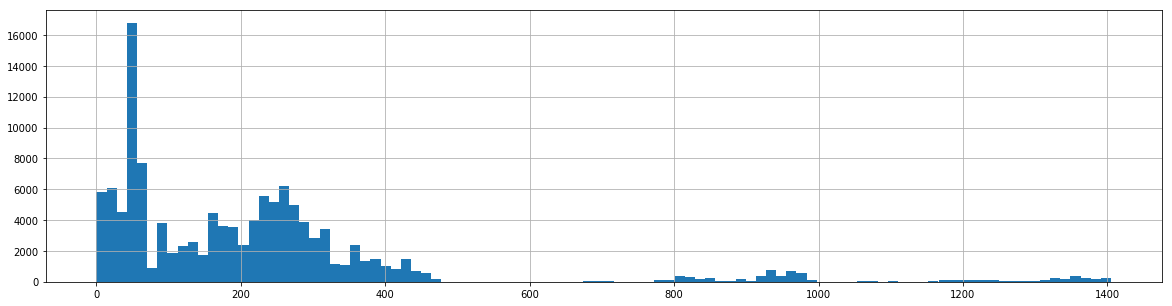

In [17]:
connections.hist(bins=100, figsize=(20, 5))

In [20]:
if __name__ == "__main__":
    from ipywidgets import interact
    @interact
    def _(cutoff=(0, 1000, 5)):  spy(df['distance'] < cutoff); gcf().set_size_inches(15, 15)

interactive(children=(IntSlider(value=500, description='cutoff', max=1000, step=5), Output()), _dom_classes=('…

## view the sparsity of the matrix.

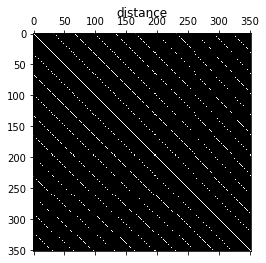

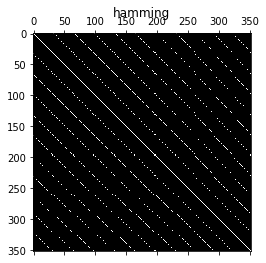

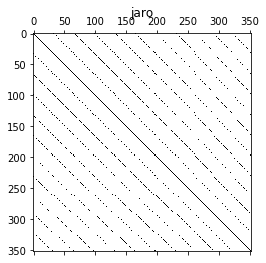

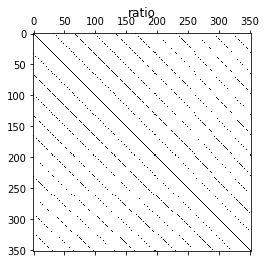

In [21]:
for alias in (distance, hamming, jaro, ratio):
    figure();spy(df[alias.__name__])
    gca().set_title(alias.__name__)